In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn import metrics

from yellowbrick.cluster import KElbowVisualizer
from time import time
import matplotlib.pyplot as plt
import seaborn as sns; 
sns.set()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
def getData():
  dataset = pd.read_csv("/content/drive/MyDrive/assignment3/pima-indians-diabetes.csv")
  X = dataset.iloc[:, :-1]
  Y = dataset.iloc[:, -1]

  X1, Y1 = make_classification(n_samples=2000, n_features=10, n_informative=5, n_redundant=2, random_state=0, n_classes=3)

  scaler = StandardScaler()
  return pd.DataFrame(scaler.fit_transform(X)), Y, pd.DataFrame(scaler.fit_transform(X1)), Y1

X1, Y1, X2, Y2 = getData()

In [3]:
X1.head()

,0,1,2,3,4,5,6,7
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [4]:
X2.head()

,0,1,2,3,4,5,6,7,8,9
0,-1.481822,0.764189,0.804382,0.945773,-0.179302,0.028083,1.371804,-1.711906,1.297470,1.006673
1,0.730177,0.527360,0.389847,0.456641,0.043871,0.355279,-2.237322,-0.050878,-0.289617,-0.262782
2,0.266050,-0.512652,-0.606012,-0.620402,0.914701,-0.973561,2.141927,1.264386,0.217032,-0.573735
3,-1.454608,-0.052730,1.234120,0.757757,0.129057,1.954665,-0.712124,-0.530354,0.366740,-0.475280
4,0.885421,-2.015780,-0.841406,-1.317751,-1.592301,0.263561,0.410073,0.084659,-0.678994,-0.835806


In [5]:
# Elbow Methods for Kmeans and Expectation Maximum
# https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f

Sum_of_squared_distances = []
K = range(2,20)
for k in K:
    km1 = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km2 = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)

    km1 = km1.fit(X1)
    km2 = km2.fit(X2)
    Sum_of_squared_distances.append([km1.inertia_, k, "Pima Diabetes Dataset"])
    Sum_of_squared_distances.append([km2.inertia_, k, "Synthetic Dataset"])

elbow_df = pd.DataFrame(Sum_of_squared_distances, columns=["Sum_of_squared_distances", "k", "Dataset"])


Text(0.5, 1.0, 'Dataset-1: Elbow Method')

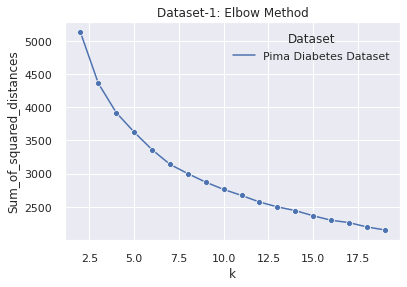

In [6]:
sns.lineplot(x="k", y="Sum_of_squared_distances", hue="Dataset", data=elbow_df[elbow_df['Dataset']=='Pima Diabetes Dataset'], marker="o").set_title("Dataset-1: Elbow Method")

Text(0.5, 1.0, 'Dataset-2: Elbow Method')

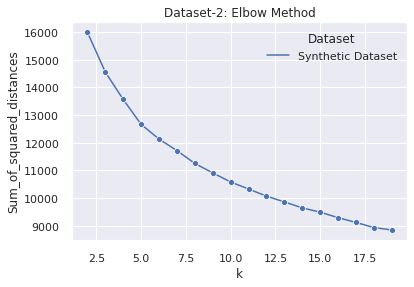

In [7]:
sns.lineplot(x="k", y="Sum_of_squared_distances", hue="Dataset", data=elbow_df[elbow_df['Dataset']=='Synthetic Dataset'], marker="o").set_title("Dataset-2: Elbow Method")

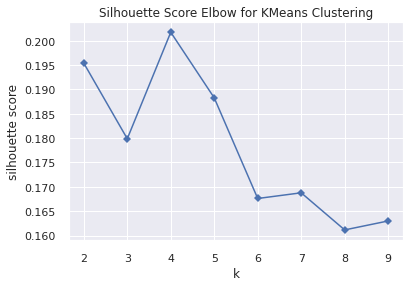

In [8]:
# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(X1)    
visualizer.poof()   

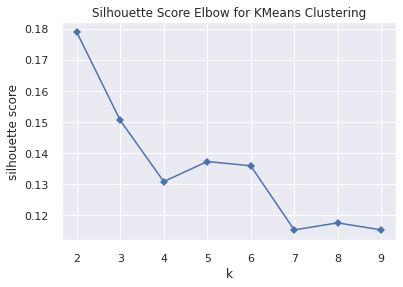

In [9]:
# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(X2)    
visualizer.poof()   

In [10]:
# Elbow Methods for Kmeans and Expectation Maximum
# https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f

silhouette_score = []

K = range(2,10)
for k in K:
    gm1 = GaussianMixture(n_components= k, random_state=0).fit(X1).predict(X1)
    gm2 = GaussianMixture(n_components= k, random_state=0).fit(X2).predict(X2)

    silhouette_score.append([metrics.silhouette_score(X1, gm1, metric='euclidean', sample_size=50), k, "Pima Diabetes Dataset"])
    silhouette_score.append([metrics.silhouette_score(X2, gm2, metric='euclidean', sample_size=50), k, "Synthetic Dataset"])

silhouette_df = pd.DataFrame(silhouette_score, columns=["silhouette_score", "k", "Dataset"])


In [11]:
silhouette_df.head()

,silhouette_score,k,Dataset
0,0.120998,2,Pima Diabetes Dataset
1,0.117191,2,Synthetic Dataset
2,0.022532,3,Pima Diabetes Dataset
3,0.026837,3,Synthetic Dataset
4,0.067916,4,Pima Diabetes Dataset


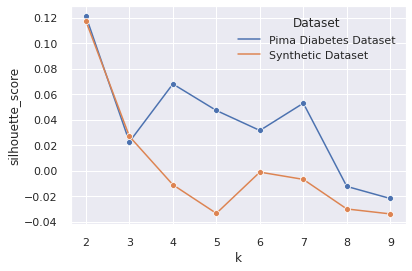

In [12]:
sns.lineplot(x="k", y="silhouette_score", hue="Dataset", data=silhouette_df, marker="o")

In [13]:
def calculateClusterMetrics(datasetName, modelName, k, model,  X, Y, dataType="Original"):
  metricOutput = []
  model.fit(X)
  Y_p = model.predict(X)
  return [
                       datasetName,
                       modelName,
                       k,dataType,
                       metrics.homogeneity_score(Y, Y_p),
                       metrics.completeness_score(Y, Y_p),
                       metrics.silhouette_score(X, Y_p, metric='euclidean', sample_size=50)
  ]

In [14]:
clusters = [x for x in range(2, 10)]
metricOutputs = []
for k in clusters:
    model1 = KMeans(init='k-means++', n_clusters=k, n_init=10)
    metricOutputs.append(calculateClusterMetrics("Pima Diabetes Dataset","KMeans", k, model1, X1, Y1))

    model2 = KMeans(init='k-means++', n_clusters=k, n_init=10)
    metricOutputs.append(calculateClusterMetrics("Synthetic Dataset","KMeans", k, model2, X2, Y2))

    model3 = GaussianMixture(n_components=k,random_state=0)
    metricOutputs.append(calculateClusterMetrics("Pima Diabetes Dataset","Expectation Maximization", k, model3, X1, Y1))

    model4 = GaussianMixture(n_components=k,random_state=0)
    metricOutputs.append(calculateClusterMetrics("Synthetic Dataset","Expectation Maximization", k, model4, X2, Y2))


In [15]:
metrics_df = pd.DataFrame(metricOutputs, columns=[
                                     "Dataset", 
                                     "Algoritm", 
                                     "Number of Clusters",
                                     "Type",
                                     "homogeneity_score",
                                     "completeness_score",
                                     "silhouette_score"
                                    
                                    ])

In [16]:
metrics_k1  = metrics_df[(metrics_df["Dataset"]=='Pima Diabetes Dataset') & (metrics_df["Algoritm"]=='KMeans')]
metrics_k2  = metrics_df[(metrics_df["Dataset"]=='Synthetic Dataset') & (metrics_df["Algoritm"]=='KMeans')]
metrics_em1  = metrics_df[(metrics_df["Dataset"]=='Pima Diabetes Dataset') & (metrics_df["Algoritm"]=='Expectation Maximization')]
metrics_em2  = metrics_df[(metrics_df["Dataset"]=='Synthetic Dataset') & (metrics_df["Algoritm"]=='Expectation Maximization')]

In [17]:
def plotPerformance(metrics_k1):

  # plot lines
  plt.plot(metrics_k1["Number of Clusters"], metrics_k1["homogeneity_score"], label = "homogeneity_score")
  plt.plot(metrics_k1["Number of Clusters"], metrics_k1["completeness_score"], label = "completeness_score")
  plt.plot(metrics_k1["Number of Clusters"], metrics_k1["silhouette_score"], label = "silhouette_score")

  plt.legend()
  plt.show()

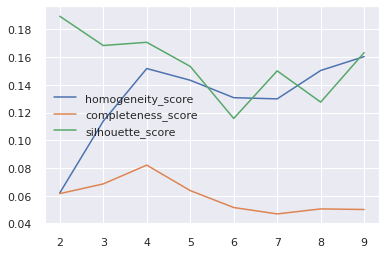

In [18]:
plotPerformance(metrics_k1)

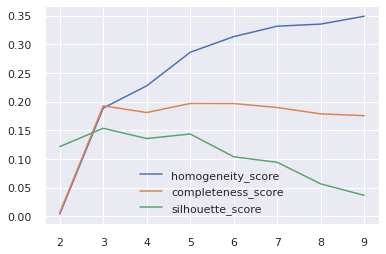

In [19]:
plotPerformance(metrics_k2)

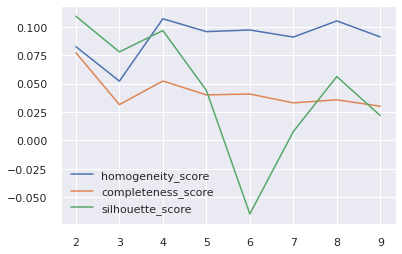

In [20]:
plotPerformance(metrics_em1)

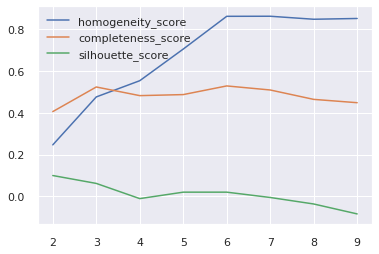

In [21]:
plotPerformance(metrics_em2)

In [22]:
from sklearn.decomposition import PCA

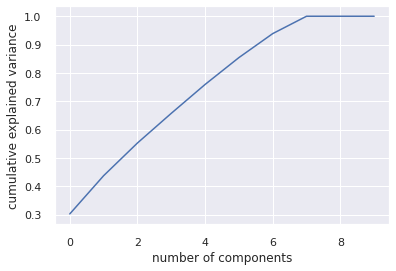

In [23]:
pca = PCA().fit(X2)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

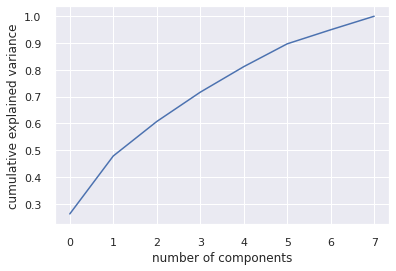

In [24]:
pca = PCA().fit(X1)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

(2000, 10)
(2000, 2)
[0.30221783 0.13487644]
[0.30221783 0.43709427]


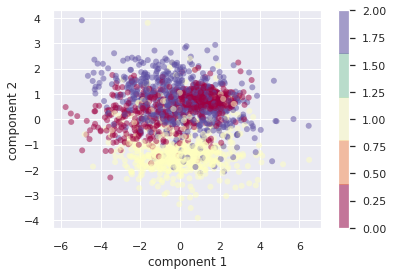

In [25]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(X2)
print(X2.shape)
print(projected.shape)
print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))
plt.scatter(projected[:, 0], projected[:, 1],
            c=Y2, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 5))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

(768, 8)
(768, 2)
[0.26179749 0.21640127]
[0.26179749 0.47819876]


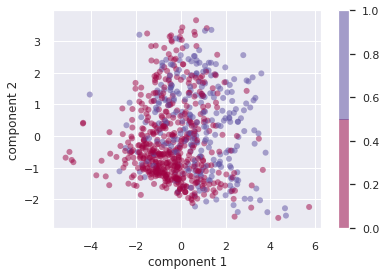

In [26]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(X1)
print(X1.shape)
print(projected.shape)
print(pca.explained_variance_ratio_)

print(np.cumsum(pca.explained_variance_ratio_))
plt.scatter(projected[:, 0], projected[:, 1],
            c=Y1, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 2))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [27]:
# Compute the components and projected faces
pca = PCA(6).fit(X2)
pcaComponents2 = pca.transform(X2)
print(pcaComponents2.shape)

(2000, 6)


In [28]:
# Compute the components and projected faces
pca = PCA(5).fit(X1)
pcaComponents1 = pca.transform(X1)
print(pcaComponents1.shape)

(768, 5)


In [29]:
from sklearn.decomposition import FastICA 
from scipy.stats import kurtosis


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


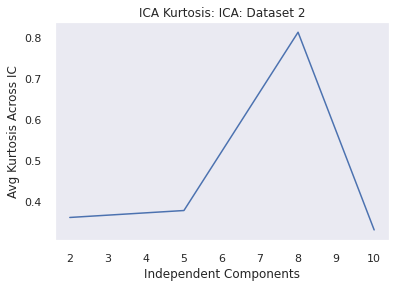

In [30]:

def run_ICA(X,y,title):
    
    dims = list(np.arange(2,(X.shape[1]-1),3))
    dims.append(X.shape[1])
    ica = FastICA(random_state=5)
    kurt = []

    for dim in dims:
        ica.set_params(n_components=dim)
        tmp = ica.fit_transform(X)
        tmp = pd.DataFrame(tmp)
        tmp = tmp.kurt(axis=0)
        kurt.append(tmp.abs().mean())

    plt.figure()
    plt.title("ICA Kurtosis: "+ title)
    plt.xlabel("Independent Components")
    plt.ylabel("Avg Kurtosis Across IC")
    plt.plot(dims, kurt, 'b-')
    plt.grid(False)
    plt.show()

run_ICA(X2,Y2,"ICA: Dataset 2")

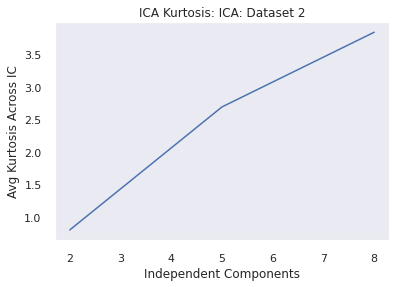

In [31]:
run_ICA(X1,Y1,"ICA: Dataset 2")

In [32]:
ica = FastICA(n_components = 8)
ica.fit(X2)
icaComponents2 = ica.transform(X2)

Text(0.5, 1.0, 'Kurtosis distribution')

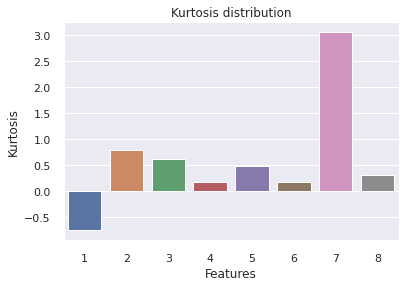

In [33]:
ax = sns.barplot(
    x=np.arange(1,len(kurtosis(icaComponents2))+1,1), 
    y=kurtosis(icaComponents2)
)
ax.set(xlabel='Features', ylabel='Kurtosis')
ax.set_title('Kurtosis distribution')

Text(0.5, 1.0, 'Kurtosis distribution')

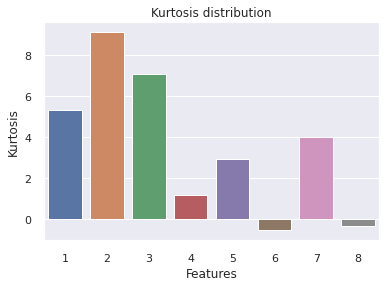

In [34]:
ica = FastICA(n_components = 8)
ica.fit(X1)
icaComponents1 = ica.transform(X1)

ax = sns.barplot(
    x=np.arange(1,len(kurtosis(icaComponents1))+1,1), 
    y=kurtosis(icaComponents1)
)
ax.set(xlabel='Features', ylabel='Kurtosis')
ax.set_title('Kurtosis distribution')

In [35]:
from sklearn.ensemble import AdaBoostClassifier


Text(0.5, 1.0, 'Feature Importance')

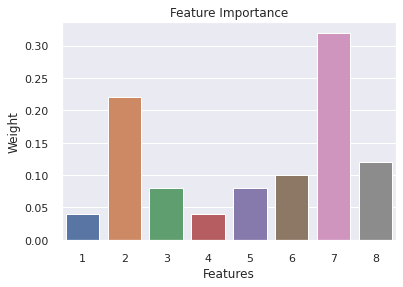

In [36]:
model = AdaBoostClassifier().fit(X1, Y1)
importances = model.feature_importances_

ax = sns.barplot(
    x=np.arange(1,8+1,1), 
    y=importances
)
ax.set(xlabel='Features', ylabel='Weight')
ax.set_title('Feature Importance')

In [37]:
adaComponents1 = X1.iloc[:, [1, 2, 4, 5, 6, 7]]
adaComponents1.head()

,1,2,4,5,6,7
0,0.848324,0.149641,-0.692891,0.204013,0.468492,1.425995
1,-1.123396,-0.160546,-0.692891,-0.684422,-0.365061,-0.190672
2,1.943724,-0.263941,-0.692891,-1.103255,0.604397,-0.105584
3,-0.998208,-0.160546,0.123302,-0.494043,-0.920763,-1.041549
4,0.504055,-1.504687,0.765836,1.409746,5.484909,-0.020496


Text(0.5, 1.0, 'Feature Importance')

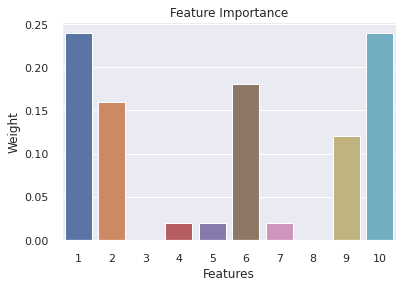

In [38]:
model = AdaBoostClassifier().fit(X2, Y2)
importances = model.feature_importances_


ax = sns.barplot(
    x=np.arange(1,X2.shape[1]+1,1), 
    y=importances
)
ax.set(xlabel='Features', ylabel='Weight')
ax.set_title('Feature Importance')

In [39]:
adaComponents2 = X2.iloc[:, [0, 1, 5, 8, 9]]
adaComponents2.head()

,0,1,5,8,9
0,-1.481822,0.764189,0.028083,1.297470,1.006673
1,0.730177,0.527360,0.355279,-0.289617,-0.262782
2,0.266050,-0.512652,-0.973561,0.217032,-0.573735
3,-1.454608,-0.052730,1.954665,0.366740,-0.475280
4,0.885421,-2.015780,0.263561,-0.678994,-0.835806


In [40]:
reducedComponents1 = [pcaComponents1, icaComponents1, adaComponents1]
reducedComponents2 = [pcaComponents2, icaComponents2, adaComponents2]
combined = [reducedComponents1, reducedComponents2]
components = ["PCA", "ICA", "Feature Selection"]
datasets = ["Pima Diabetes Dataset","Synthetic Dataset"]
Ys = [Y1, Y2]

In [41]:
clusters = [x for x in range(2, 10)]
optimizedMetricOutputs = []
for i in range(len(reducedComponents1)):
  for k in clusters:
    for l in range(len(combined)):
      model = KMeans(init='k-means++', n_clusters=k, n_init=10)
      optimizedMetricOutputs.append(calculateClusterMetrics(datasets[l],"KMeans", k, model, combined[l][i], Ys[l], components[i]))

      model = GaussianMixture(n_components=k,random_state=0)
      optimizedMetricOutputs.append(calculateClusterMetrics(datasets[l],"Expectation Maximization", k, model, combined[l][i], Ys[l], components[i]))


In [42]:
metrics_df = pd.DataFrame(optimizedMetricOutputs, columns=[
                                     "Dataset", 
                                     "Algoritm", 
                                     "Number of Clusters",
                                     "Type",
                                     "homogeneity_score",
                                     "completeness_score",
                                     "silhouette_score"
                                    
                                    ])

In [43]:
metrics_k1  = metrics_df[(metrics_df["Dataset"]=='Pima Diabetes Dataset') & (metrics_df["Algoritm"]=='KMeans')]
metrics_k2  = metrics_df[(metrics_df["Dataset"]=='Synthetic Dataset') & (metrics_df["Algoritm"]=='KMeans')]
metrics_em1  = metrics_df[(metrics_df["Dataset"]=='Pima Diabetes Dataset') & (metrics_df["Algoritm"]=='Expectation Maximization')]
metrics_em2  = metrics_df[(metrics_df["Dataset"]=='Synthetic Dataset') & (metrics_df["Algoritm"]=='Expectation Maximization')]

In [44]:
def plotOptimizedGraphs(metrics_k1, score, label):
  sns.lineplot(data=metrics_k1, x="Number of Clusters", y=score, hue="Type").set_title(label)

In [45]:
scores = ["homogeneity_score", "completeness_score","silhouette_score"]

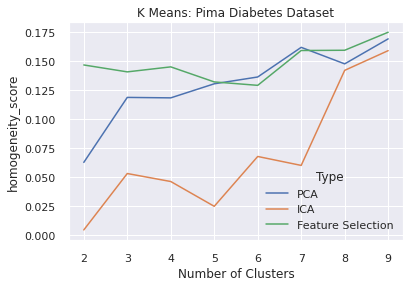

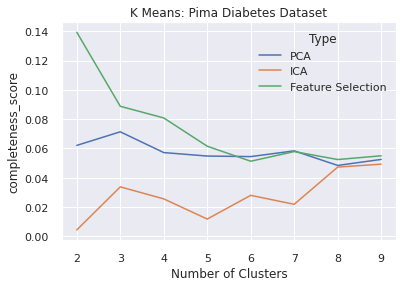

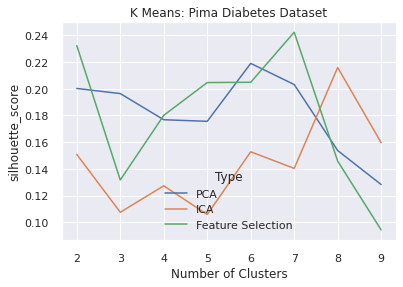

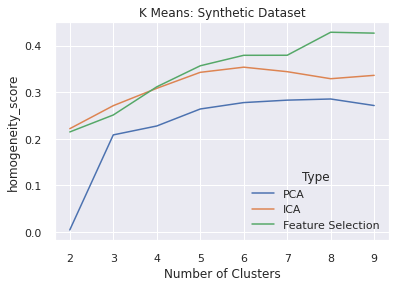

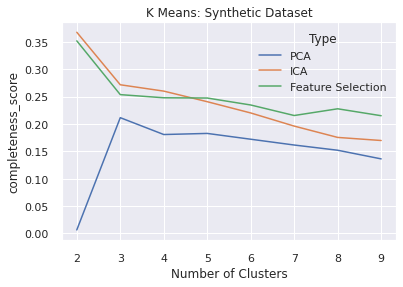

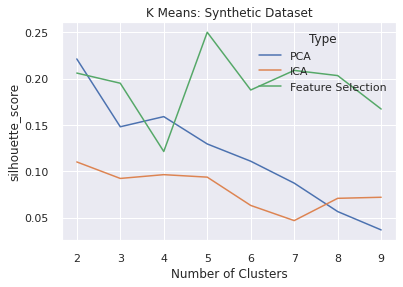

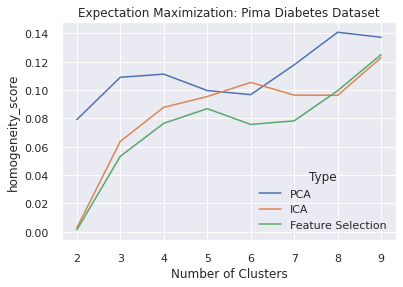

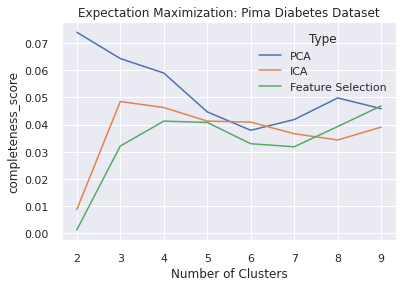

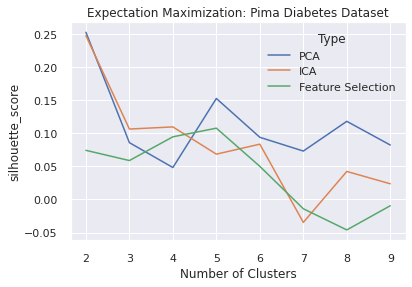

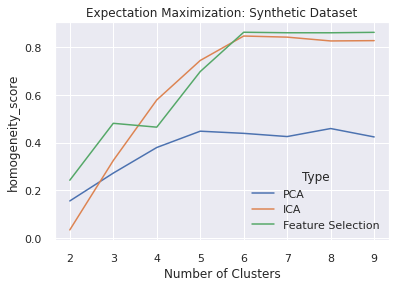

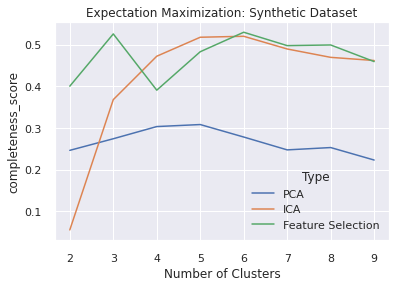

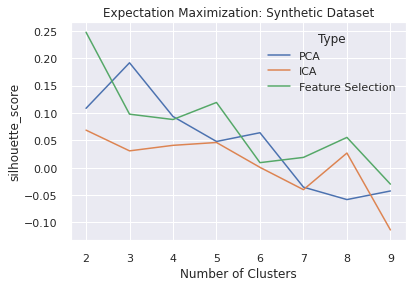

<Figure size 432x288 with 0 Axes>

In [46]:
metrics = [metrics_k1, metrics_k2, metrics_em1, metrics_em2]
metricLabels = ["K Means: Pima Diabetes Dataset", 
                "K Means: Synthetic Dataset",
                "Expectation Maximization: Pima Diabetes Dataset",
                "Expectation Maximization: Synthetic Dataset",
                ]
for i in range(len(metrics)):
  for score in scores:
    plotOptimizedGraphs(metrics[i], score, metricLabels[i])
    plt.figure()

In [47]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [48]:
def performNN(data, i, j):

  start = time()
  
  nn = MLPClassifier(max_iter=100, learning_rate_init=0.01, hidden_layer_sizes=[4], random_state=0)
  x_train, x_test, y_train, y_test = train_test_split(data, Ys[i], test_size = 0.3, random_state = 0, shuffle = True)
  nn.fit(x_train, y_train)

  data_train_pred_PCA = nn.predict(x_train)
  train_time = time()-start


  train_accuracy = float(sum(data_train_pred_PCA == y_train))/float(len(y_train))

  start = time()
  data_test_pred_PCA = nn.predict(x_test)
  test_accuracy = float(sum(data_test_pred_PCA == y_test))/float(len(y_test))
  test_time = time()-start

  return [datasets[i], components[j], train_accuracy, test_accuracy, train_time, test_time]


In [49]:
nn_output1 = []
for i in range(len(combined)):
  for j in range(len(combined[i])):
    nn_output1.append(performNN(combined[i][j], i, j))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [50]:
df_nn_output1 = pd.DataFrame(nn_output1, columns=['Dataset', 'Algorithm','train_accuracy', 'test_accuracy', 'train_time', 'test_time'])

In [51]:
df_nn_output1

,Dataset,Algorithm,train_accuracy,test_accuracy,train_time,test_time
0,Pima Diabetes Dataset,PCA,0.767225,0.766234,0.132163,0.000503
1,Pima Diabetes Dataset,ICA,0.778399,0.783550,0.127571,0.000535
2,Pima Diabetes Dataset,Feature Selection,0.776536,0.774892,0.136123,0.001436
3,Synthetic Dataset,PCA,0.770000,0.768333,0.349136,0.002666
4,Synthetic Dataset,ICA,0.740000,0.721667,0.332660,0.002871
5,Synthetic Dataset,Feature Selection,0.857857,0.835000,0.332744,0.003348


In [52]:
def performNNWithKmeansCluster(data, i, j, n):

  start = time()
  
  nn = MLPClassifier(max_iter=100, learning_rate_init=0.01, hidden_layer_sizes=[4], random_state=0)
  kmeans = KMeans(n_clusters=n)
  data['cluster'] = kmeans.fit_predict(data)
  x_train, x_test, y_train, y_test = train_test_split(data, Ys[i], test_size = 0.3, random_state = 0, shuffle = True)
  nn.fit(x_train, y_train)

  data_train_pred_PCA = nn.predict(x_train)
  train_time = time()-start


  train_accuracy = float(sum(data_train_pred_PCA == y_train))/float(len(y_train))

  start = time()
  data_test_pred_PCA = nn.predict(x_test)
  test_accuracy = float(sum(data_test_pred_PCA == y_test))/float(len(y_test))
  test_time = time()-start

  return [datasets[i], components[j], train_accuracy, test_accuracy, train_time, test_time]


In [53]:
nn_output2_kmeans = []
for i in range(len(combined)):
  for j in range(len(combined[i])):
    if i == 0:
      nn_output2_kmeans.append(performNNWithKmeansCluster(pd.DataFrame(combined[i][j]), i, j, 4))
    else:
      nn_output2_kmeans.append(performNNWithKmeansCluster(pd.DataFrame(combined[i][j]), i, j, 5))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [54]:
df_nn_output2_kmeans = pd.DataFrame(nn_output2_kmeans, columns=['Dataset', 'Algorithm','train_accuracy', 'test_accuracy', 'train_time', 'test_time'])

In [55]:
df_nn_output2_kmeans

,Dataset,Algorithm,train_accuracy,test_accuracy,train_time,test_time
0,Pima Diabetes Dataset,PCA,0.761639,0.753247,0.156834,0.000766
1,Pima Diabetes Dataset,ICA,0.761639,0.787879,0.194738,0.001080
2,Pima Diabetes Dataset,Feature Selection,0.782123,0.766234,0.227283,0.001724
3,Synthetic Dataset,PCA,0.708571,0.701667,0.522648,0.003636
4,Synthetic Dataset,ICA,0.755714,0.738333,0.545539,0.003454
5,Synthetic Dataset,Feature Selection,0.827143,0.811667,0.478695,0.004058


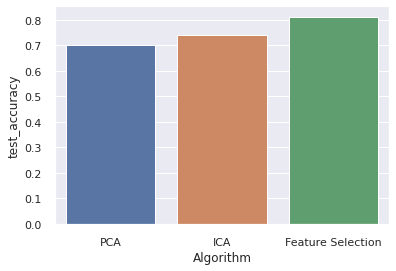

In [59]:
sns.barplot(x='Algorithm', y='test_accuracy', data=df_nn_output2_kmeans[df_nn_output2_kmeans['Dataset']=='Synthetic Dataset'])

In [60]:
def performNNWithEmCluster(data, i, j, n):

  start = time()
  
  nn = MLPClassifier(max_iter=100, learning_rate_init=0.01, hidden_layer_sizes=[4], random_state=0)
  em = GaussianMixture(n_components=n, random_state=0)
  data['cluster'] = em.fit_predict(data)
  x_train, x_test, y_train, y_test = train_test_split(data, Ys[i], test_size = 0.3, random_state = 0, shuffle = True)
  nn.fit(x_train, y_train)

  data_train_pred_PCA = nn.predict(x_train)
  train_time = time()-start


  train_accuracy = float(sum(data_train_pred_PCA == y_train))/float(len(y_train))

  start = time()
  data_test_pred_PCA = nn.predict(x_test)
  test_accuracy = float(sum(data_test_pred_PCA == y_test))/float(len(y_test))
  test_time = time()-start

  return [datasets[i], components[j], train_accuracy, test_accuracy, train_time, test_time]

nn_output2_em = []
for i in range(len(combined)):
  for j in range(len(combined[i])):
    if i == 0:
      nn_output2_em.append(performNNWithEmCluster(pd.DataFrame(combined[i][j]), i, j, 4))
    else:
      nn_output2_em.append(performNNWithEmCluster(pd.DataFrame(combined[i][j]), i, j, 5))

pd.DataFrame(nn_output2_em, columns=['Dataset', 'Algorithm','train_accuracy', 'test_accuracy', 'train_time', 'test_time'])

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,Dataset,Algorithm,train_accuracy,test_accuracy,train_time,test_time
0,Pima Diabetes Dataset,PCA,0.756052,0.753247,0.145443,0.001877
1,Pima Diabetes Dataset,ICA,0.752328,0.792208,0.141468,0.001697
2,Pima Diabetes Dataset,Feature Selection,0.783985,0.770563,0.141293,0.001113
3,Synthetic Dataset,PCA,0.762857,0.745000,0.433783,0.003400
4,Synthetic Dataset,ICA,0.777857,0.745000,0.375476,0.003356
5,Synthetic Dataset,Feature Selection,0.829286,0.818333,0.375230,0.003595
